In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_images)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

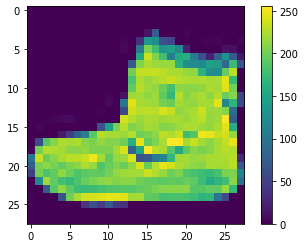

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

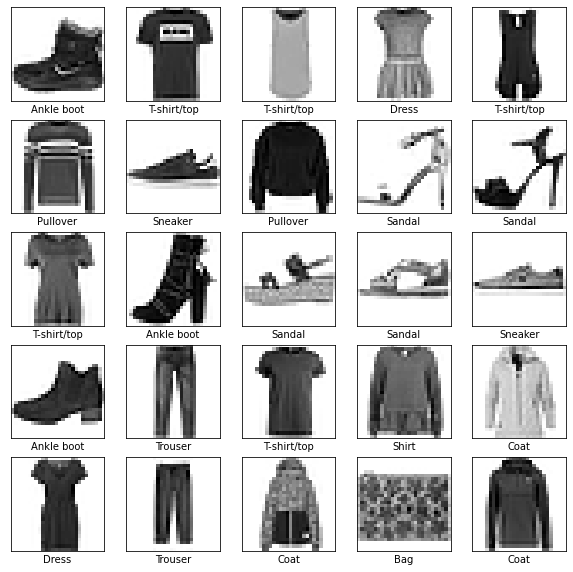

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#budowa modelu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy',])

In [14]:
#trenowanie modelu
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.3283 - accuracy: 0.6962
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7146 - accuracy: 0.7456
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6091 - accuracy: 0.7796
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5499 - accuracy: 0.7934
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.8095
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5167 - accuracy: 0.8180
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5029 - accuracy: 0.8263
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4887 - accuracy: 0.8305
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8344
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.469

In [15]:
#ocena dokładności modelu
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\n test accuracy: {test_acc}')

313/313 - 1s - loss: 0.5218 - accuracy: 0.8261 - 651ms/epoch - 2ms/step

 test accuracy: 0.8260999917984009


In [16]:
#Prognoza
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.2762945e-21, 5.9477305e-18, 0.0000000e+00, 4.6690044e-15,
 0.0000000e+00, 5.4763000e-02, 6.5850247e-24, 5.7873260e-02,
 1.2752679e-13, 8.8736373e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color = color)

In [22]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

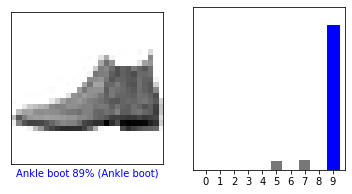

In [23]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)

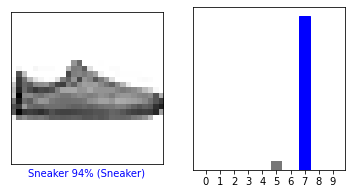

In [24]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)

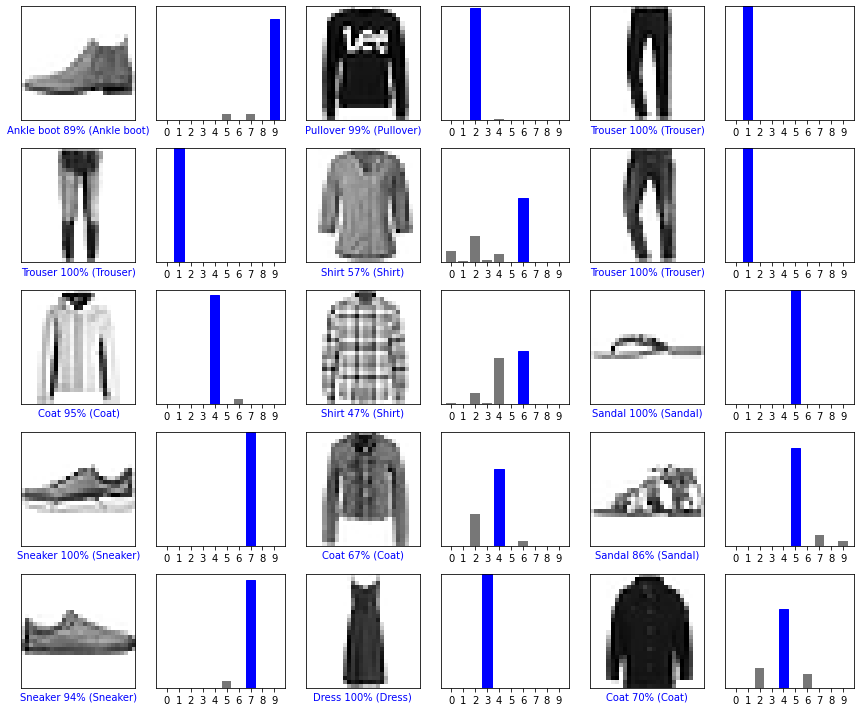

In [25]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions[i],test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.6067014e-03 5.8327714e-06 9.8703730e-01 1.4066694e-05 1.0357318e-02
  2.4739366e-29 9.7379647e-04 0.0000000e+00 4.9784248e-06 0.0000000e+00]]


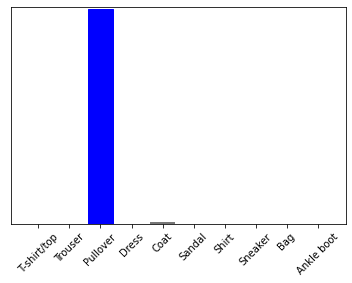

In [29]:
plot_value_array(1,predictions_single[0],test_labels)
_= plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2